## Wczytanie danych i bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# file = "ks_projects_201801.csv"
# filepath = os.path.join(os.path.abspath(""), file)

In [3]:
df = pd.read_csv("ks_projects_201801.csv")


## Wstępne sprawdzenie danych

In [4]:
# Usunięcie wartości NaN
df = df.dropna()

# Ujednolicenie kolumn z datami, przekształcenie na format datetime
df['deadline_new'] = pd.to_datetime(df['deadline']).dt.date
df['launched_new'] = pd.to_datetime(df['launched']).dt.date

# Obliczenie czasu trwania projektów, oczyszczenie danych - przekształcenie na typ int
df['duration'] = df['deadline_new'] - df['launched_new']
df['duration'] = df['duration'].map(lambda x: int(str(x).split(" ")[0]))

# Wyodrębnienie dwóch stanów projektów: successful = 1, pozostałe = 0
df["state_new"] = df["state"].map(lambda x: 1 if x == "successful" else 0 )


df.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_new,launched_new,duration,state_new
31367,1159596274,My Japanese Husband Thinks I'm Crazy: The Comi...,Comic Books,Comics,USD,2014-08-30,6485.0,2014-07-27 14:15:22,14199.0,successful,461,US,14199.00,14199.00,6485.00,2014-08-30,2014-07-27,34,1
167187,1850371890,Lima: The Untold Story,Shorts,Film & Video,USD,2012-04-06,1.0,2012-03-13 19:35:55,1156.0,successful,14,US,1156.00,1156.00,1.00,2012-04-06,2012-03-13,24,1
330509,753765969,ELEV8TED ENTERTAINMENT,Music,Music,USD,2017-07-29,3000.0,2017-06-29 19:48:02,10.0,failed,1,US,0.00,10.00,3000.00,2017-07-29,2017-06-29,30,0
168757,1858503937,Polaroids in the Park,Photography,Photography,GBP,2013-09-17,1000.0,2013-08-18 15:35:39,67.5,failed,5,GB,105.49,108.13,1601.95,2013-09-17,2013-08-18,30,0
144785,1735556819,9th Annual Fakoly African Drum & Dance Project,World Music,Music,USD,2016-03-10,2000.0,2016-02-24 05:21:20,2160.0,successful,22,US,2160.00,2160.00,2000.00,2016-03-10,2016-02-24,15,1


In [5]:
# df.columns

In [6]:
# Usunięcie niepotrzebnych kolumn
to_drop = ["currency",
           "deadline",
           "goal",
           "launched",
           "pledged",
           "state",
           "usd pledged"]

df.drop(to_drop, inplace=True, axis=1)

In [7]:
# df.head()

In [8]:
# Sprawdzenie, czy projekty się powtarzają
df["ID"].duplicated().any()

False

## Ogólna analiza danych

In [9]:
# Sprawdzenie ile było projektów w poszczególnych krajach
project_country = dict(df["country"].value_counts())

# project_country

In [10]:
# Połączenie Luksemburga, Belgii i Holandii w Beneluks

df["country"] = df["country"].replace(["LU", "BE"],"NL")

project_country = dict(df["country"].value_counts())
# project_country

In [11]:
# Odrzucenie krajów, w których liczba projektów jest poniżej 1000

df = df[(df["country"] != "SG") 
        & (df["country"] != "JP") 
        & (df["country"] != "AT") 
        & (df["country"] != "HK")
        & (df["country"] != "NO")
        & (df["country"] != "CH")
        & (df["country"] != "IE")]
# df["country"].unique()

In [12]:
# Zaktualizowana liczba projektów w poszczególnych krajach

project_country_s = dict(df["country"].value_counts())
# project_country_s

In [13]:
# Odfiltrowanie projektów, które odniosły sukces w poszczególnych krajach

success_filter = df[df["state_new"] == 1]
group_success_filter = success_filter.groupby(by=["country"])
sum_success = dict(group_success_filter["state_new"].sum())

# sum_success

In [14]:
# Wizualizacja liczby projektów w poszczególnych krajch - sumarycznie i tych, które zdobyły finansowanie

all_country_list = []
success_country_list = []
country_list = []
for k, v in project_country_s.items():
    all_country_list.append(v)
    success_item = sum_success[k]
    success_country_list.append(success_item)
    country_list.append(k)
        
# print(all_country_list)
# print(success_country_list)
# print(country_list)

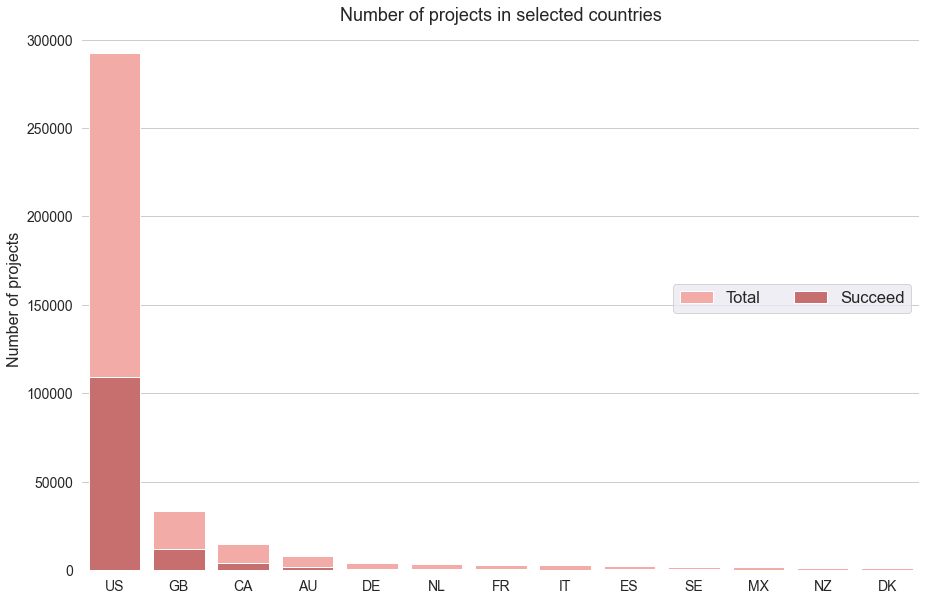

In [15]:
sns.set_theme(style="whitegrid")

# Ustawienia ogólne dla wykresu
f, ax = plt.subplots(figsize=(15, 10))
plt.title("Number of projects in selected countries", fontdict={'fontsize': 18})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of projects', fontdict={'fontsize': 16})

# Wykres ogólnej liczby projektów
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")
sns.barplot(x=country_list, y=all_country_list,
            label="Total", color="r")

# Wykres liczby projektów, które uzyskały finansowanie
sns.set_color_codes("muted")
sns.barplot(x=country_list, y=success_country_list,
            label="Succeed", color="r")

# Formatowanie legendy
ax.legend(ncol=2, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)

In [16]:
# Procent projektów, które się udały

perc_success = {key: round(((sum_success[key] / project_country[key]) * 100), 1) for key, value in sum_success.items()}

# Procent projektów, które się udały - sortowanie wartości

perc_success_sort = {k: v for k, v in sorted(perc_success.items(), key=lambda item: item[1], reverse=True)}

In [17]:
# Wizualizacja odsetka sfinansowanych projektów w zależności od kraju

perc_country_list = []
country_list_2 = []
for country, perc in perc_success_sort.items():
    perc_country_list.append(perc)
    country_list_2.append(country)
        
# print(perc_country_list)
# print(country_list_2)

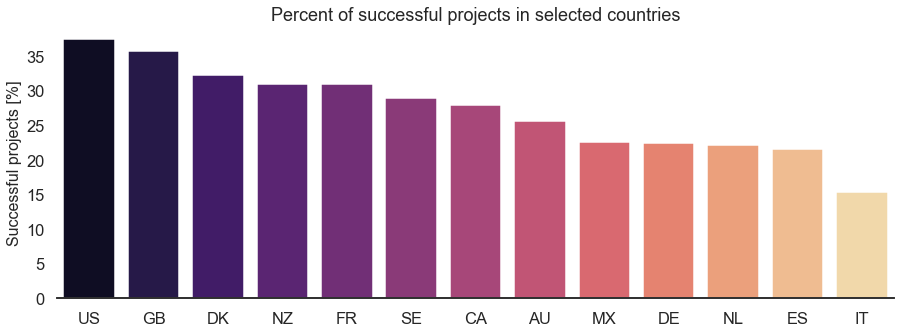

In [18]:
sns.set_theme(style="white", context="talk")

plt.figure(figsize=(15, 5))
plt.title("Percent of successful projects in selected countries", fontdict={'fontsize': 18})
plt.ylabel("Successful projects [%]", fontdict={'fontsize': 16})

sns.barplot(x=country_list_2, y=perc_country_list, palette="magma")

sns.despine(left=True);

#### Charakterystyka rozkładu liczby osób wspierających projekty

In [19]:
# Charakterystyka rozkładu liczby osób wspierających projekty

df.groupby(by="country")["backers"].describe().style.set_properties(**{'text-align':'center', 'padding':'15px'})

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AU,7839.000000,82.002296,504.925487,0.000000,1.000000,6.000000,38.000000,20787.000000
CA,14756.000000,88.273448,715.378241,0.000000,1.000000,7.000000,42.000000,70122.000000
DE,4171.000000,98.333014,488.289484,0.000000,1.000000,6.000000,39.000000,12412.000000
DK,1113.000000,69.246181,218.904155,0.000000,1.000000,9.000000,43.000000,2749.000000
ES,2276.000000,72.155975,330.955818,0.000000,1.000000,5.000000,37.000000,9086.000000
FR,2939.000000,119.160939,530.768091,0.000000,1.000000,10.000000,59.000000,12103.000000
GB,33671.000000,84.926940,618.784137,0.000000,2.000000,11.000000,49.000000,73206.000000
IT,2878.000000,53.974635,294.783477,0.000000,1.000000,3.000000,21.000000,6934.000000
MX,1752.000000,24.453196,84.482508,0.000000,1.000000,3.000000,23.000000,2384.000000


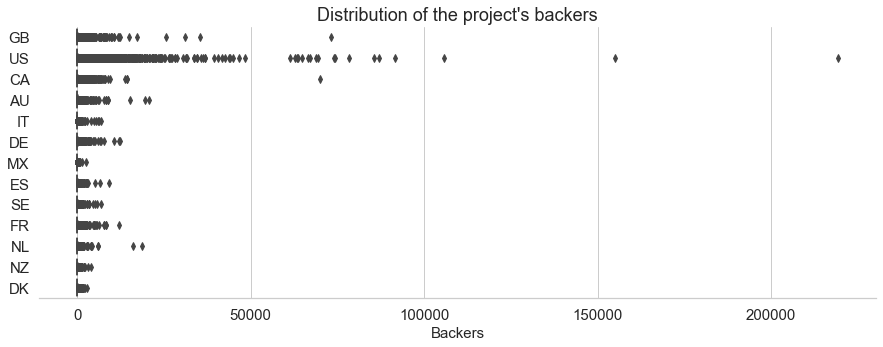

In [20]:
# Wizualizacja rozkładu liczby osób wspierających projekty

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution of the project's backers", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu liczby osób wspierających projekty
sns.boxplot(x=df["backers"], y=df["country"]);

ax.set_xlabel("Backers",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

In [21]:
# Usunięcie 5 % najwyższych wartości

df_95b = df[(df["backers"] < np.quantile(df["backers"],0.95))]

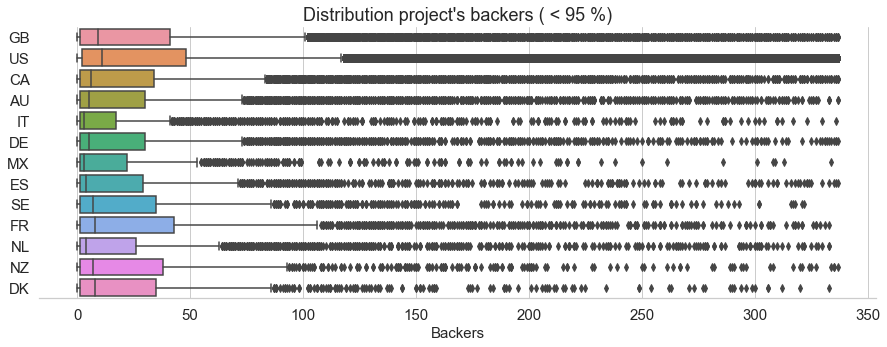

In [22]:
# Wizualizacja rozkładu liczby osób wspierających projekty

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution project's backers ( < 95 %)", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu liczby osób wspierających projekty
sns.boxplot(x=df_95b["backers"], y=df_95b["country"]);

ax.set_xlabel("Backers",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

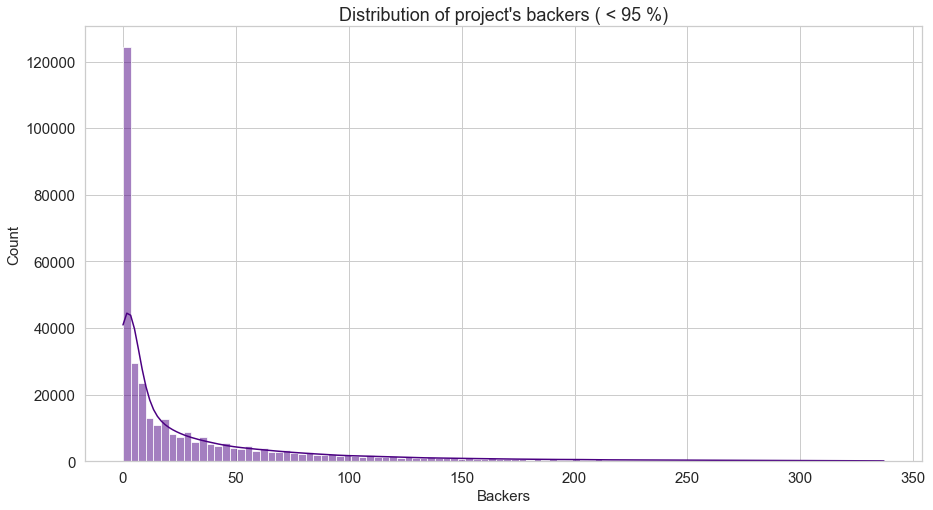

In [23]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 8))
plt.title("Distribution of project's backers ( < 95 %)", fontdict={'fontsize': 18})
plt.xlabel('Backers', fontdict={'fontsize': 15})
plt.ylabel("", fontdict={'fontsize': 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.histplot(df_95b["backers"], bins=100, kde=True, color="indigo");

#### Charakterystyka rozkładu liczby osób wspierających sfinansowane projekty

In [24]:
# Charakterystyka rozkładu liczby osób wspierających projekty, które uzyskały finansowanie

success_filter.groupby(by="country")["backers"].describe().style.set_properties(**{'text-align':'center', 'padding':'15px'})

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AU,2010.000000,263.884577,939.511475,1.000000,33.000000,81.000000,195.000000,20787.000000
CA,4134.000000,267.064828,1326.294185,1.000000,30.000000,71.000000,180.000000,70122.000000
DE,937.000000,368.593383,971.497716,1.000000,35.000000,95.000000,274.000000,12412.000000
DK,360.000000,179.161111,336.140501,2.000000,24.000000,60.000000,158.250000,2749.000000
ES,492.000000,263.995935,667.250055,1.000000,37.000000,93.500000,237.500000,9086.000000
FR,908.000000,333.392070,898.243842,1.000000,40.000000,97.500000,245.000000,12103.000000
GB,12067.000000,202.747162,1015.273428,1.000000,27.000000,59.000000,144.000000,73206.000000
IT,439.000000,256.560364,630.640495,1.000000,30.500000,86.000000,228.000000,6210.000000
MX,396.000000,83.757576,160.969489,2.000000,27.750000,47.000000,85.250000,2384.000000


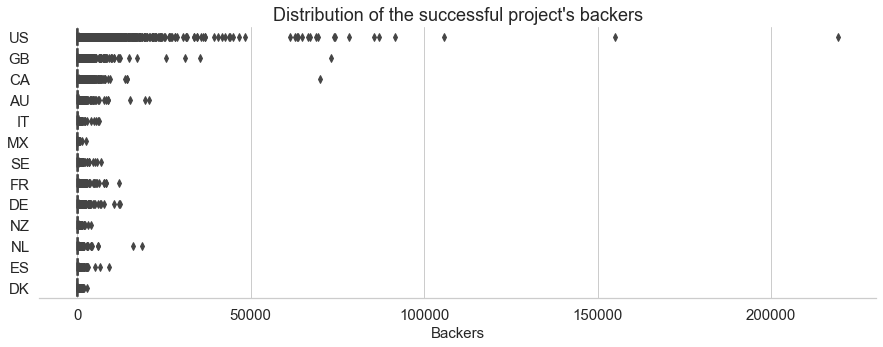

In [25]:
# Wizualizacja rozkładu liczby osób wspierających projekty, które uzyskały finansowanie

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution of the successful project's backers", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu liczby osób wspierających projekty
sns.boxplot(x=success_filter["backers"], y=success_filter["country"]);

ax.set_xlabel("Backers",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

In [26]:
# Usunięcie 5 % najwyższych wartości

df_95bs = success_filter[(success_filter["backers"] < np.quantile(success_filter["backers"],0.95))]

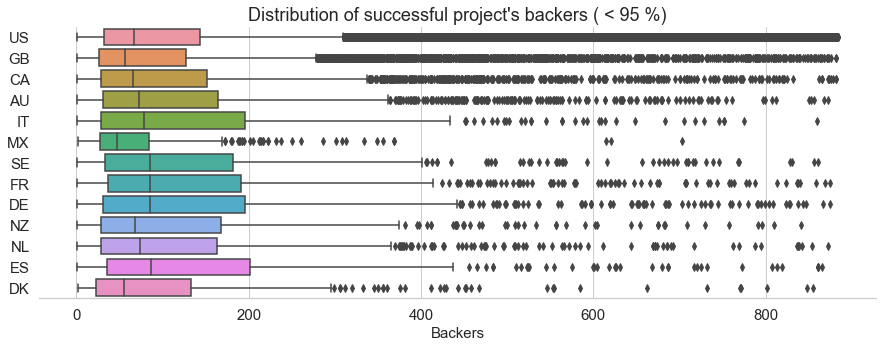

In [27]:
# Wizualizacja rozkładu liczby osób wspierających projekty, które uzyskały finansowanie

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution of successful project's backers ( < 95 %)", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu liczby osób wspierających projekty
sns.boxplot(x=df_95bs["backers"], y=df_95bs["country"]);

ax.set_xlabel("Backers",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

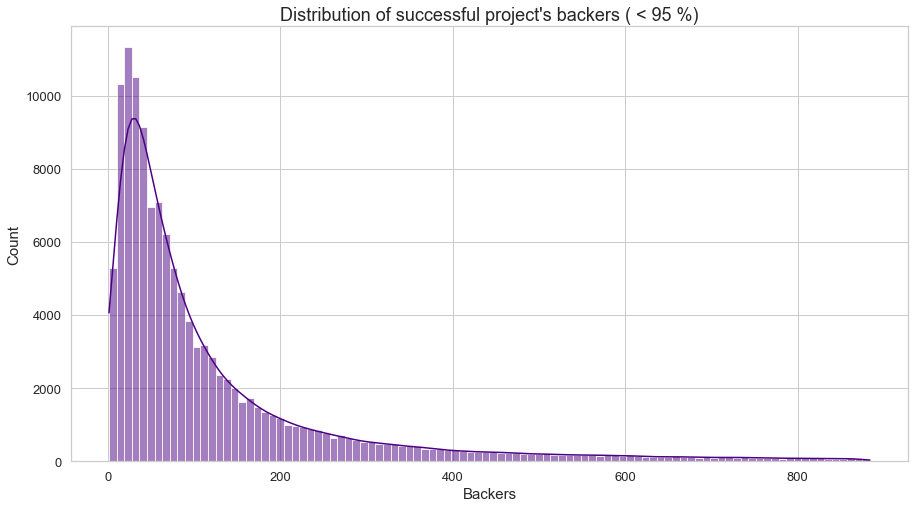

In [28]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 8))
plt.title("Distribution of successful project's backers ( < 95 %)", fontdict={'fontsize': 18})
plt.xlabel('Backers', fontdict={'fontsize': 15})
plt.ylabel("", fontdict={'fontsize': 15})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

sns.histplot(df_95bs["backers"], bins=100, kde=True, color="indigo");

## Wyodrębnienie czynników mających wpływ na zakończenie projektu sukcesem

### 1. Miesiąc rozpoczęcia zbiórki

In [29]:
# Wyodrębnienie roku i miesiąca z danych 

df['year_launched'] = pd.DatetimeIndex(df['launched_new']).year
df['month_launched'] = pd.DatetimeIndex(df['launched_new']).month
df['year_deadline'] = pd.DatetimeIndex(df['deadline_new']).year
df['month_deadline'] = pd.DatetimeIndex(df['deadline_new']).month
# df.head()

In [30]:
# Sprawdzenie ile projektów powstało w poszczególnych latach

df["year_launched"].value_counts()

2015    74051
2014    66843
2016    55280
2017    50389
2013    44836
2012    41161
2011    26236
2010    10519
2009     1329
2018      120
1970        6
Name: year_launched, dtype: int64

In [31]:
# Usunięcie rekordów z 1970 roku

df = df[df["year_launched"] != 1970]
# df["year_launched"].unique()

In [32]:
# Ile było rozpoczętych projektów w poszczególnych krajach w danym miesiącu
#
all_month_grouped = df.groupby(by=["country", "month_launched"]).size().reset_index(name="sum")

# Usuwam US z danych do Heatmap ze względu na to, że znacznie zawyża górną granicę danych (nie widać różnic w innych krajach)
all_month_grouped_us = all_month_grouped[all_month_grouped["country"] != "US"]

In [33]:
# Przygotowanie danych do Heatmap'y

df_month = all_month_grouped_us.pivot("country", "month_launched", "sum")
# df_month

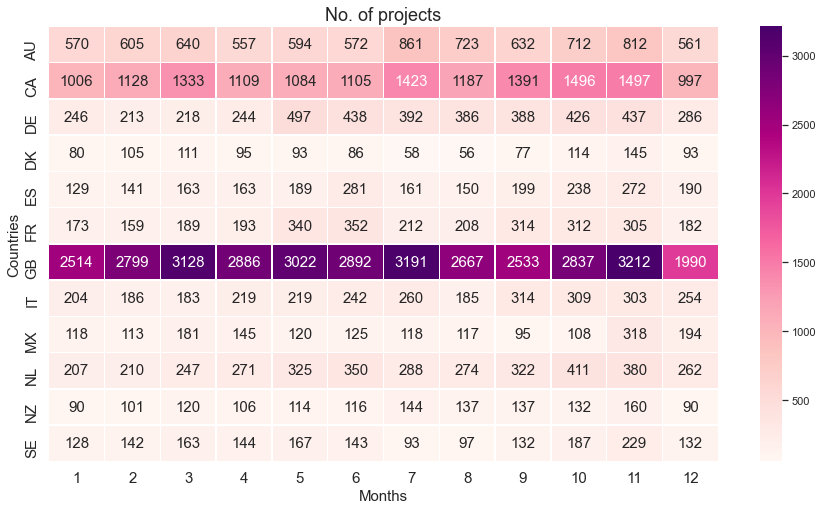

In [34]:
# Wizualizacja liczby projektów w analizowanych krajach w poszczególnych miesiącach

fig, ax = plt.subplots(figsize=(15, 8))

plt.title("No. of projects", fontdict={'fontsize': 18})

sns.heatmap(df_month, fmt="d", annot=True, annot_kws={"fontsize":15}, linewidths=.5, cmap="RdPu")

ax.set_xlabel("Months",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("Countries",fontsize=15);

In [35]:
# Odfiltrowanie projektów, które uzyskały finansowanie

success_filter = df[df["state_new"] == 1]

month_grouped = success_filter.groupby(by=["country", "month_launched"]).size().reset_index(name="sum_success")

In [36]:
# Stworzenie tabeli z pogrupowanymi projektami

df_merge_month = pd.merge(all_month_grouped, month_grouped, on=["country", "month_launched"], how="left")

df_merge_month["perc_success"] = round(100 * df_merge_month["sum_success"] / df_merge_month["sum"], 2)

In [37]:
# Przygotowanie danych do Heatmap'y

df_month_perc = df_merge_month.pivot("country", "month_launched", "perc_success")

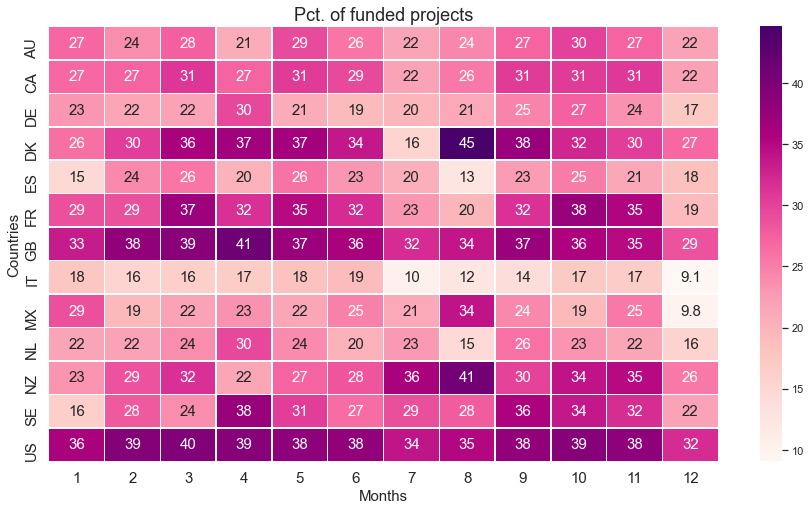

In [38]:
# Wizualizacja liczby sfinansowanych projektów w analizowanych krajach w poszczególnych miesiącach

fig, ax = plt.subplots(figsize=(15, 8))

plt.title("Pct. of funded projects", fontdict={'fontsize': 18})

sns.heatmap(df_month_perc, annot=True, annot_kws={"fontsize":15}, linewidths=.5, cmap="RdPu")

ax.set_xlabel("Months",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("Countries",fontsize=15);

#### W związku z tym, że nie ma wyraźnego trendu wskazującego na to, że w jakimś okresie szansa na uzyskanie finansowania projektu  jest większa (zarówno najmniejsze jak i największe wartości są rozdystrybułowane dość przypadkowo), nie bierzemy tej zależności pod uwagę w budowaniu aplikacji.

### 2. Kategoria główna

In [39]:
df["main_category"].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [40]:
# Ile było projektów w poszczególnych krajach w danej kategorii

all_mcategory_grouped = df.groupby(by=["country", "main_category"]).size().reset_index(name="sum")

# Ile było projektów, które zostały sfinansowane w poszczególnych krajach w danej kategorii

mcategory_grouped = success_filter.groupby(by=["country", "main_category"]).size().reset_index(name="sum_success")

# Stworzenie tabeli z pogrupowanymi projektami i odsetkiem sfinansowanych projektów

df_merge_mcategory = pd.merge(all_mcategory_grouped, mcategory_grouped, on=["country", "main_category"], how="left")
df_merge_mcategory = df_merge_mcategory.fillna(0.0)
df_merge_mcategory["perc_success"] = round(100 * df_merge_mcategory["sum_success"] / df_merge_mcategory["sum"], 2)

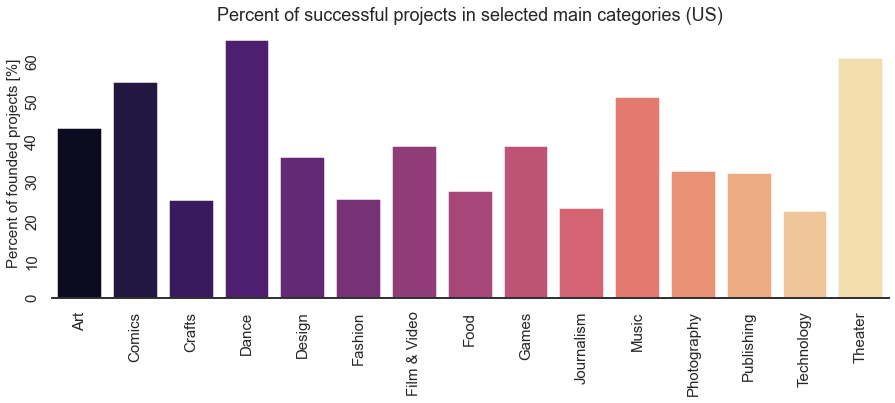

In [41]:
# Wizualizacja odsetka sfinansowanych projektów w zależności od kategorii, w której projekt został złożony
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Percent of successful projects in selected main categories (US)", fontdict={'fontsize': 18})

df_country = df_merge_mcategory[df_merge_mcategory["country"] == "US"]

sns.barplot(x="main_category", y="perc_success", palette="magma", data=df_country)

ax.set_xlabel("",fontsize=15)
ax.tick_params(labelsize=15, rotation=90)
ax.set_ylabel("Percent of founded projects [%]",fontsize=15)
sns.despine(left=True);

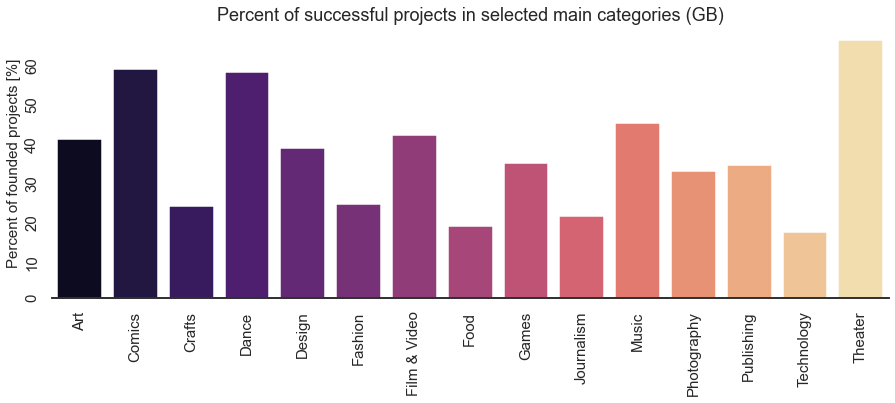

In [42]:
# Wizualizacja odsetka sfinansowanych projektów w zależności od kategorii, w której projekt został złożony
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Percent of successful projects in selected main categories (GB)", fontdict={'fontsize': 18})

df_country = df_merge_mcategory[df_merge_mcategory["country"] == "GB"]

sns.barplot(x="main_category", y="perc_success", palette="magma", data=df_country)

ax.set_xlabel("",fontsize=15)
ax.tick_params(labelsize=15, rotation=90)
ax.set_ylabel("Percent of founded projects [%]",fontsize=15)
sns.despine(left=True);

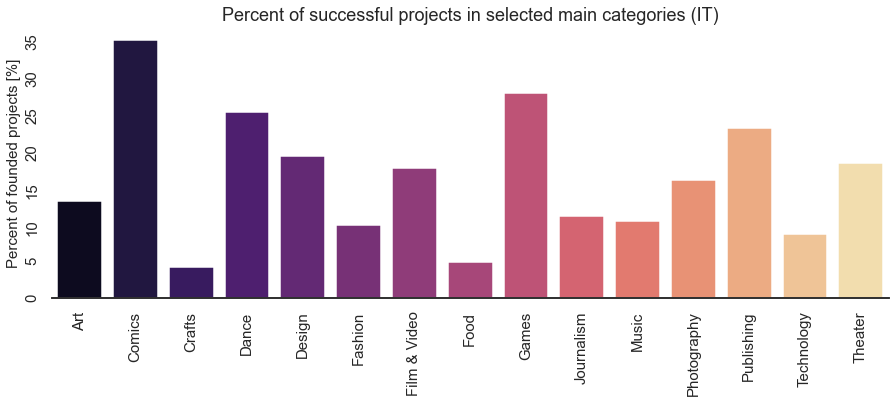

In [43]:
# Wizualizacja odsetka sfinansowanych projektów w zależności od kategorii, w której projekt został złożony
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Percent of successful projects in selected main categories (IT)", fontdict={'fontsize': 18})

df_country = df_merge_mcategory[df_merge_mcategory["country"] == "IT"]

sns.barplot(x="main_category", y="perc_success", palette="magma", data=df_country)

ax.set_xlabel("",fontsize=15)
ax.tick_params(labelsize=15, rotation=90)
ax.set_ylabel("Percent of founded projects [%]",fontsize=15)
sns.despine(left=True);

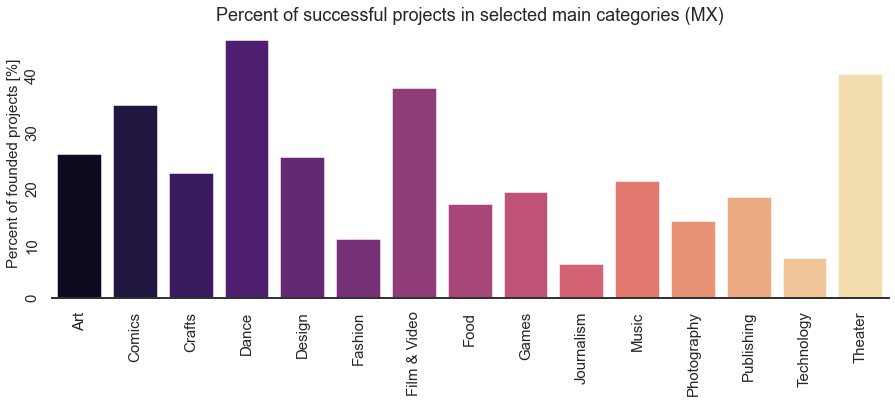

In [44]:
# Wizualizacja odsetka sfinansowanych projektów w zależności od kategorii, w której projekt został złożony
sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Percent of successful projects in selected main categories (MX)", fontdict={'fontsize': 18})

df_country = df_merge_mcategory[df_merge_mcategory["country"] == "MX"]

sns.barplot(x="main_category", y="perc_success", palette="magma", data=df_country)

ax.set_xlabel("",fontsize=15)
ax.tick_params(labelsize=15, rotation=90)
ax.set_ylabel("Percent of founded projects [%]",fontsize=15)
sns.despine(left=True);

#### We wszystkich państwach widać wyraźną zależność powodzenia projektu od tego w jakiej kategorii został złożony, więc kategoria będzie jednym z parametrów analizowanych w aplikacji.

### 3. Podkategoria

In [45]:
# df["category"].unique()

In [46]:
# Ile było projektów w poszczególnych krajach w danej podkategorii

all_category_grouped = df.groupby(by=["country", "main_category", "category"]).size().reset_index(name="sum")

# Ile było projektów, które zostały sfinansowane w poszczególnych krajach w danej podkategorii

category_grouped = success_filter.groupby(by=["country", "main_category", "category"]).size().reset_index(name="sum_success")

# Stworzenie tabeli z pogrupowanymi projektami i odsetkiem sfinansowanych projektów

df_merge_category = pd.merge(all_category_grouped, category_grouped, on=["country", "main_category", "category"], how="left")
df_merge_category = df_merge_category.fillna(0.0)
df_merge_category["perc_success"] = round(100 * df_merge_category["sum_success"] / df_merge_category["sum"], 2)

# df_merge_category

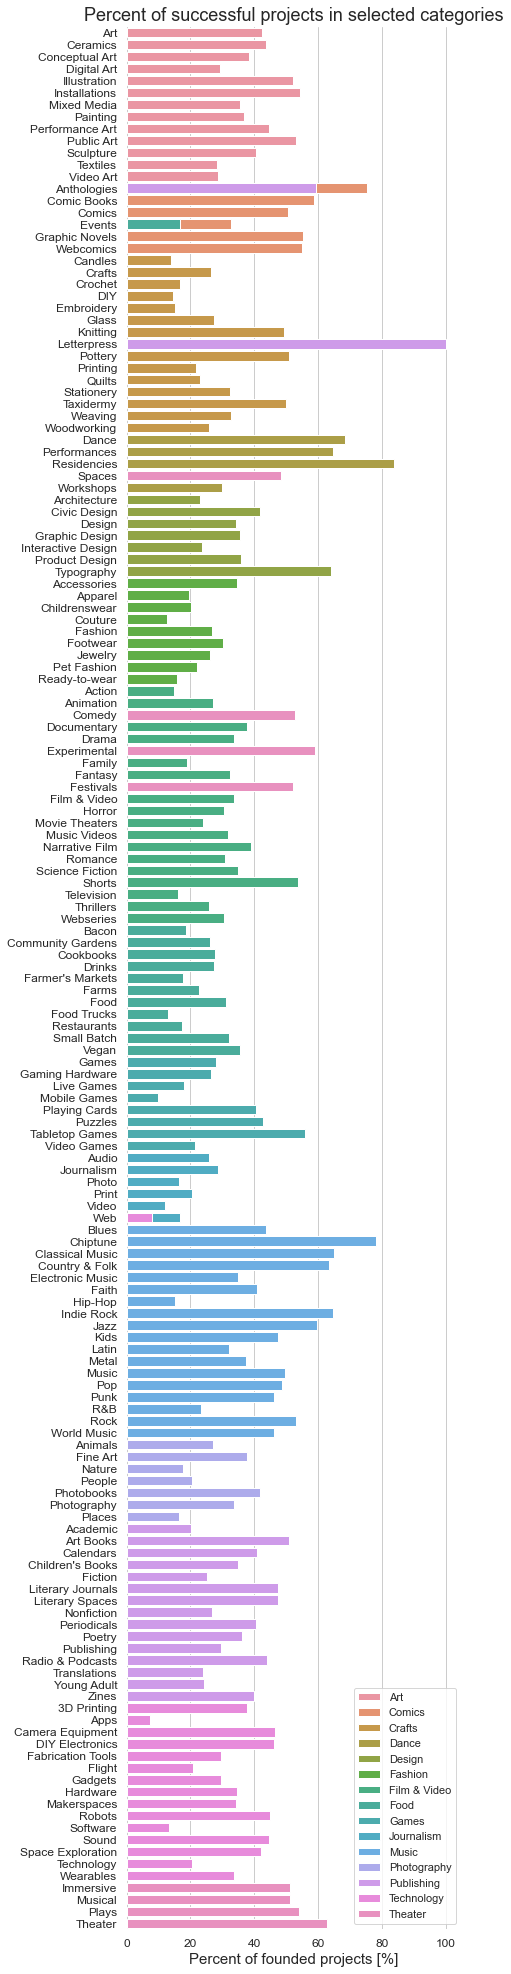

In [47]:
# Wizualizacja odsetka sfinansowanych projektów w zależności od podkategorii, w której projekt został złożony

df_country_cat = df_merge_category[ df_merge_category["country"] == "US" ]

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(6, 35))

plt.title("Percent of successful projects in selected categories", fontdict={'fontsize': 18})

sns.barplot(x="perc_success", y="category", hue="main_category", data=df_country_cat, dodge=False)

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set_xlabel("Percent of founded projects [%]",fontsize=15)
ax.tick_params(labelsize=12)
ax.set_ylabel("",fontsize=20)
sns.despine(left=True, bottom=True);

#### We wszystkich państwach widać wyraźną zależność powodzenia projektu od tego w jakiej podkategorii został złożony, więc podkategoria jest jednym z parametrów analizowanych w aplikacji.

### 4. Czas trwania zbiórki

In [48]:
# Charakterystyka rozkładu czasu trwania projektów

df["duration"].describe().to_frame().style.set_properties(**{'padding':'15px'})

,duration
count,370764.000000
mean,34.215121
std,12.817008
min,1.000000
25%,30.000000
50%,30.000000
75%,37.000000
max,92.000000


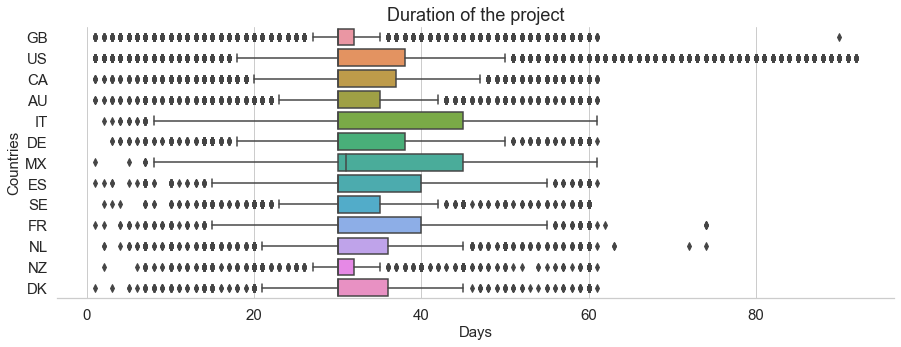

In [49]:
# Wizualizacja czasu trwania projektów w róznych krajach

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Duration of the project", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu czasu trwania projektów
sns.boxplot(x=df["duration"], y=df["country"]);

ax.set_xlabel("Days",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("Countries",fontsize=15)
sns.despine(left=True);

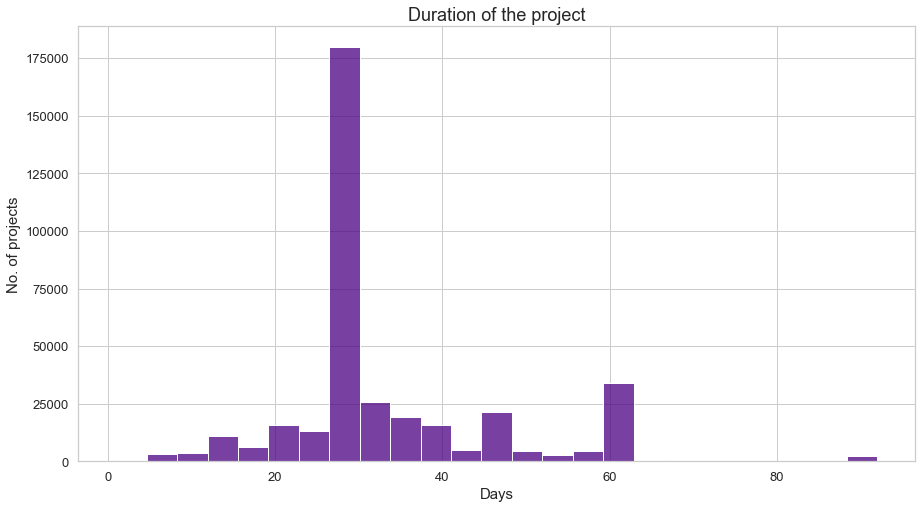

In [50]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 8))
plt.title("Duration of the project", fontdict={'fontsize': 18})
plt.xlabel('Days', fontdict={'fontsize': 15})
plt.ylabel('No. of projects', fontdict={'fontsize': 15})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

sns.histplot(df["duration"], bins=25, color="indigo");

In [51]:
# Charakterystyka rozkładu czasu trwania sfinansowanych projektów

success_filter["duration"].describe().to_frame().style.set_properties(**{'padding':'15px'})

,duration
count,132787.000000
mean,32.154669
std,11.783091
min,1.000000
25%,30.000000
50%,30.000000
75%,34.000000
max,92.000000


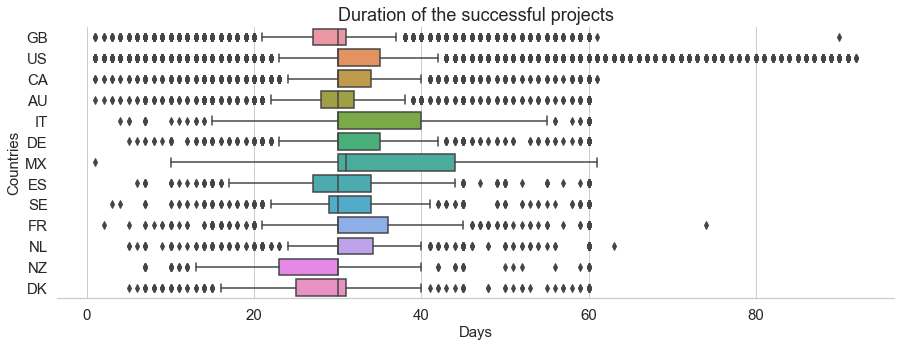

In [52]:
# Wizualizacja czasu trwania sfinansowanych projektów

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Duration of the successful projects", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu czasu trwania projektów
sns.boxplot(x=success_filter["duration"], y=df["country"]);

ax.set_xlabel("Days",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("Countries",fontsize=15)
sns.despine(left=True);

#### Możliwe jest określenie przedziałów czasowych, które mogłyby zwiększyć prawdopodobieństwo zakończenia zbiórki sukcesem

### 5. Kwota zbiórki

#### Charakterystyka rozkładu kwot zgłaszanych zbiórek

In [53]:
# Charakterystyka rozkładu kwot docelowych zgłaszanych projektów

df.groupby(by="country")["usd_goal_real"].describe().style.set_properties(**{'text-align':'center', 'padding':'15px'})

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AU,7839.000000,58108.238300,1092073.826450,0.720000,1864.280000,6279.300000,18493.550000,87092840.970000
CA,14756.000000,44408.442966,1019377.575326,0.730000,1879.280000,5761.375000,17991.277500,82624142.770000
DE,4171.000000,75208.408327,1694473.699883,1.080000,2805.745000,10606.030000,27889.960000,107369867.720000
DK,1113.000000,35581.350836,439483.036630,0.740000,1487.940000,5032.880000,15078.180000,14461315.980000
ES,2276.000000,52578.874587,467681.145857,1.040000,2225.490000,7025.715000,23495.567500,17104542.970000
FR,2939.000000,81047.372872,2102100.094850,1.090000,2907.380000,9521.680000,26113.775000,110169771.620000
GB,33671.000000,42775.298964,1337027.959093,1.220000,1402.065000,4745.860000,15383.200000,166361390.710000
IT,2878.000000,78807.782960,1027304.585521,1.100000,3293.387500,11131.520000,32767.335000,44336067.390000
MX,1752.000000,14869.932825,146023.768192,0.490000,1374.442500,2988.835000,7046.922500,5289326.140000


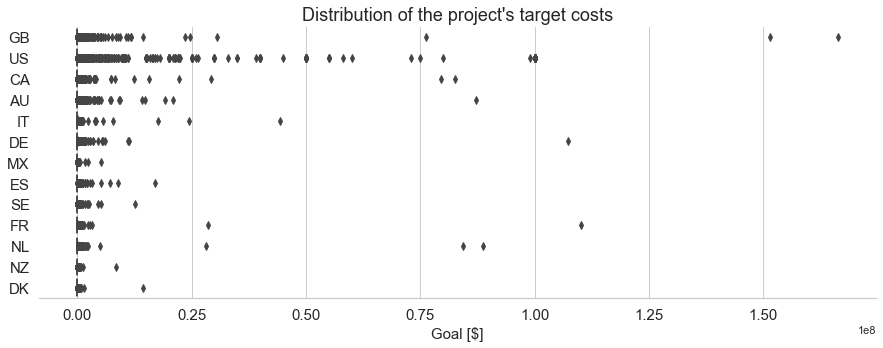

In [54]:
# Wizualizacja rozkładu kwot docelowych zgłaszanych projektów
sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution of the project's target costs", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu kwot projektów w wybranych krajach
sns.boxplot(x=df["usd_goal_real"], y=df["country"]);

ax.set_xlabel("Goal [$]",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

In [55]:
# Usunięcie 5 % najwyższych wartości

df_95 = df[(df['usd_goal_real'] < np.quantile(df['usd_goal_real'],0.95))]

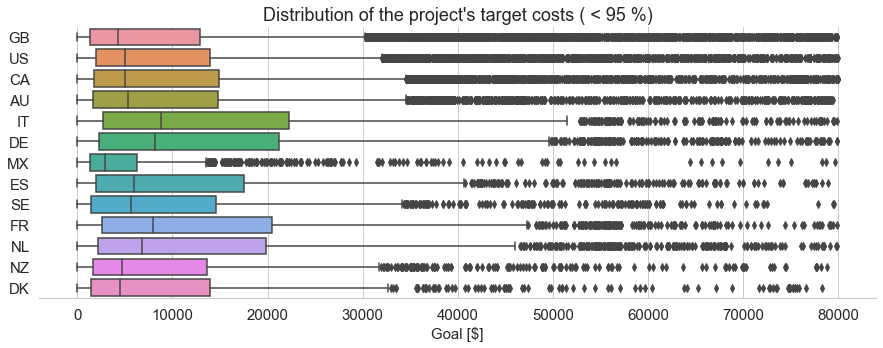

In [56]:
# Wizualizacja rozkładu kwot docelowych zgłaszanych projektów
sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution of the project's target costs ( < 95 %)", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu kwot projektów w wybranych krajach
sns.boxplot(x=df_95["usd_goal_real"], y=df_95["country"]);

ax.set_xlabel("Goal [$]",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

#### Charakterystyka rozkładu kwot sfinansowanych zbiórek

In [57]:
# Charakterystyka rozkładu kwot zebranych zgłaszanych projektów

df.groupby(by="country")["usd_pledged_real"].describe().style.set_properties(**{'text-align':'center', 'padding':'15px'})

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AU,7839.000000,5962.128806,32977.498647,0.000000,8.225000,221.730000,2396.295000,1121309.260000
CA,14756.000000,6220.748131,42598.719983,0.000000,7.840000,302.820000,2734.732500,2500533.660000
DE,4171.000000,9536.387924,46103.256337,0.000000,10.890000,286.410000,3037.440000,1069748.490000
DK,1113.000000,6813.352713,29354.053473,0.000000,14.270000,372.510000,2840.210000,600707.310000
ES,2276.000000,5688.775738,25347.197756,0.000000,2.127500,157.305000,2539.177500,502621.740000
FR,2939.000000,11690.203409,59201.303721,0.000000,17.725000,540.860000,4975.665000,1764896.670000
GB,33671.000000,7026.433109,56074.644061,0.000000,29.030000,506.200000,3203.640000,5494492.810000
IT,2878.000000,5693.546668,38032.485848,0.000000,1.120000,112.115000,1573.522500,1059078.190000
MX,1752.000000,1387.002568,4325.523069,0.000000,0.530000,84.650000,1051.842500,117954.590000


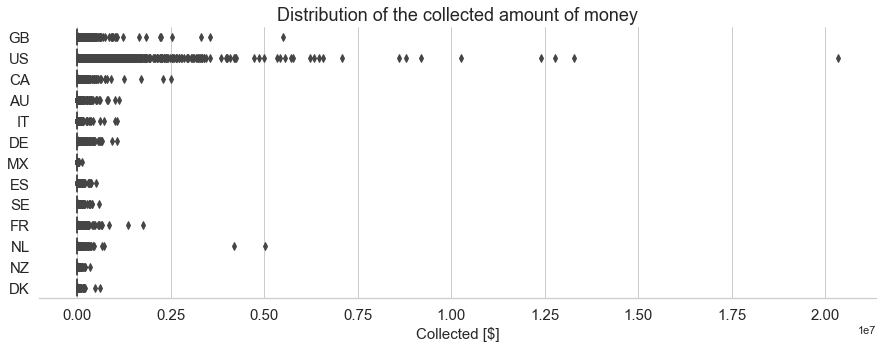

In [58]:
# Wizualizacja rozkładu kwot zebranych zgłaszanych projektów

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution of the collected amount of money", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu zebranych kwot projektów w wybranych krajach
sns.boxplot(x=df["usd_pledged_real"], y=df["country"]);

ax.set_xlabel("Collected [$]",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

In [59]:
# Usunięcie 5 % najwyższych wartości

df_95p = df[(df['usd_pledged_real'] < np.quantile(df['usd_pledged_real'],0.95))]

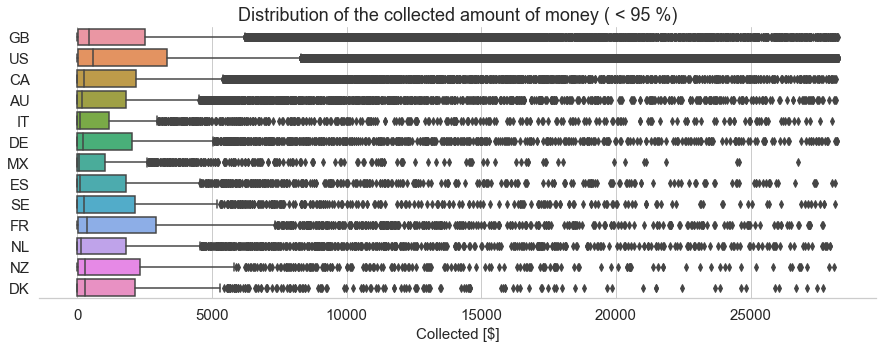

In [60]:
# Wizualizacja rozkładu kwot zebranych zgłaszanych projektów

sns.set_theme(style="whitegrid")

# Ogólne ustawienia dla wykresu
fig, ax = plt.subplots(figsize=(15, 5))

plt.title("Distribution of the collected amount of money ( < 95 %)", fontdict={'fontsize': 18})

# Wykres skrzynkowy dla rozkładu zebranych kwot projektów w wybranych krajach
sns.boxplot(x=df_95p["usd_pledged_real"], y=df_95p["country"]);

ax.set_xlabel("Collected [$]",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_ylabel("",fontsize=15)
sns.despine(left=True);

#### Zadeklarowaną kwotę projektu należy uznać za czynnik mający wpływ na jego powodzenie